In [51]:
import scanpy as sc
import drug2cell as d2c
import pandas as pd
import matplotlib as plt

In [52]:
pip install openpyxl


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



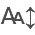

In [53]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [23]:
adata = sc.read_h5ad("/Users/mennayoussef/Downloads/Galaxy20-[Clustered_and_Annotated_Adult_NCMs].h5ad")

In [54]:
adata

AnnData object with n_obs × n_vars = 698500 × 52143
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type'
    var: 'gene_symbols-2', 'Mito-2', 'Mito-3', 'gene_symbols-4', 'Mito-4', 'gene_symbols-5', 'Mito-5', 'gene_symbols-6', 'Mito-6', 'n_cells', 'Mito', 'gene_symbols', 'Mito-0', 'gene_symbols-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'log1p_mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'log1p_total_counts-0-0', 

In [55]:
subset_AF = adata[
    (adata.obs['General_Region'] == 'AtrialApp') &
    (adata.obs['NCM Cell Type'] == 'Macrophages') &
    ((adata.obs['Disease'] == 'AF') | (adata.obs['Disease'] == 'Healthy')) &
    (adata.obs['Sex'] == 'Male')
].copy()
subset_AF

AnnData object with n_obs × n_vars = 13443 × 52143
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type'
    var: 'gene_symbols-2', 'Mito-2', 'Mito-3', 'gene_symbols-4', 'Mito-4', 'gene_symbols-5', 'Mito-5', 'gene_symbols-6', 'Mito-6', 'n_cells', 'Mito', 'gene_symbols', 'Mito-0', 'gene_symbols-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'log1p_mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'log1p_total_counts-0-0', '

In [32]:
print(subset_AF.obs.head())
print(subset_AF.obs.columns)


                           Region   Sex Age Age_Range Cell_or_Nuclei Disease  \
AFALCTCTCAGGTCAATGGG-0/2-0    LAA  Male  62     60-65           Cell      AF   
AFALATTTCACCATCTAACG-0/2-0    LAA  Male  62     60-65           Cell      AF   
AFALCTCTCGAGTACCTTCC-0/2-0    LAA  Male  62     60-65           Cell      AF   
AFALTCATTTGCATTCCTCG-0/2-0    LAA  Male  62     60-65           Cell      AF   
AFALTGACTCCGTGTCCAAT-0/2-0    LAA  Male  62     60-65           Cell      AF   

                           Study Study_Batch Study_Type  n_genes_by_counts  \
AFALCTCTCAGGTCAATGGG-0/2-0  Yang        Yang       Yang               4947   
AFALATTTCACCATCTAACG-0/2-0  Yang        Yang       Yang               3874   
AFALCTCTCGAGTACCTTCC-0/2-0  Yang        Yang       Yang               3538   
AFALTCATTTGCATTCCTCG-0/2-0  Yang        Yang       Yang               3088   
AFALTGACTCCGTGTCCAAT-0/2-0  Yang        Yang       Yang               3603   

                            ...  batch2  General_R

In [26]:
subset_AF

AnnData object with n_obs × n_vars = 13957 × 52143
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type'
    var: 'gene_symbols-2', 'Mito-2', 'Mito-3', 'gene_symbols-4', 'Mito-4', 'gene_symbols-5', 'Mito-5', 'gene_symbols-6', 'Mito-6', 'n_cells', 'Mito', 'gene_symbols', 'Mito-0', 'gene_symbols-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'log1p_mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'log1p_total_counts-0-0', '

In [35]:
df = subset_AF.obs
df

Region     Sex   Age Age_Range Cell_or_Nuclei  \
AFALCTCTCAGGTCAATGGG-0/2-0    LAA    Male    62     60-65           Cell   
AFALATTTCACCATCTAACG-0/2-0    LAA    Male    62     60-65           Cell   
AFALCTCTCGAGTACCTTCC-0/2-0    LAA    Male    62     60-65           Cell   
AFALTCATTTGCATTCCTCG-0/2-0    LAA    Male    62     60-65           Cell   
AFALTGACTCCGTGTCCAAT-0/2-0    LAA    Male    62     60-65           Cell   
...                           ...     ...   ...       ...            ...   
SC_96359_16_49-0/4-0          LAA    Male  42.0     40-45           Cell   
SC_96359_39_37-0/4-0          LAA    Male  42.0     40-45           Cell   
SC_100355_27_36/5-0           LAA  Female    49     45-50           Cell   
SC_100355_44_4/5-0            LAA  Female    49     45-50           Cell   
SC_104720_63_54/5-0           LAA    Male    42     40-45           Cell   

                            Disease Study Study_Batch Study_Type  \
AFALCTCTCAGGTCAATGGG-0/2-0       AF  Yang        Yang       Yang   
AFALATTTCACCATCTAACG-0/2-0       AF  Yang        Yang       Yang   
AFALCTCTCGAGTACCTTCC-0/2-0       AF  Yang        Yang       Yang   
AFALTCATTTGCATTCCTCG-0/2-0       AF  Yang        Yang       Yang   
AFALTGACTCCGTGTCCAAT-0/2-0       AF  Yang        Yang       Yang   
...                             ...   ...         ...        ...   
SC_96359_16_49-0/4-0        Healthy  Wang         NCM       Wang   
SC_96359_39_37-0/4-0        Healthy  Wang          CM       Wang   
SC_100355_27_36/5-0         Healthy  Wang          CM       Wang   
SC_100355_44_4/5-0          Healthy  Wang         NCM       Wang   
SC_104720_63_54/5-0         Healthy  Wang          CM       Wang   

                            n_genes_by_counts  ...  batch2  General_Region  \
AFALCTCTCAGGTCAATGGG-0/2-0               4947  ...       2       AtrialApp   
AFALATTTCACCATCTAACG-0/2-0               3874  ...       2       AtrialApp   
AFALCTCTCGAGTACCTTCC-0/2-0               3538  ...       2       AtrialApp   
AFALTCATTTGCATTCCTCG-0/2-0               3088  ...       2       AtrialApp   
AFALTGACTCCGTGTCCAAT-0/2-0               3603  ...       2       AtrialApp   
...                                       ...  ...     ...             ...   
SC_96359_16_49-0/4-0                     5411  ...       4       AtrialApp   
SC_96359_39_37-0/4-0                     3648  ...       4       AtrialApp   
SC_100355_27_36/5-0                      2525  ...       5       AtrialApp   
SC_100355_44_4/5-0                       1601  ...       5       AtrialApp   
SC_104720_63_54/5-0                      2103  ...       5       AtrialApp   

                            Foetal Cluster  Adult Cluster  Cluster  \
AFALCTCTCAGGTCAATGGG-0/2-0             NaN            5.0        5   
AFALATTTCACCATCTAACG-0/2-0             NaN            5.0        5   
AFALCTCTCGAGTACCTTCC-0/2-0             NaN            5.0        5   
AFALTCATTTGCATTCCTCG-0/2-0             NaN            5.0        5   
AFALTGACTCCGTGTCCAAT-0/2-0             NaN            5.0        5   
...                                    ...            ...      ...   
SC_96359_16_49-0/4-0                   NaN            5.0        5   
SC_96359_39_37-0/4-0                   NaN            5.0        5   
SC_100355_27_36/5-0                    NaN            5.0        5   
SC_100355_44_4/5-0                     NaN            5.0        5   
SC_104720_63_54/5-0                    NaN            5.0        5   

                            Foetal Cell Type  \
AFALCTCTCAGGTCAATGGG-0/2-0               nan   
AFALATTTCACCATCTAACG-0/2-0               nan   
AFALCTCTCGAGTACCTTCC-0/2-0               nan   
AFALTCATTTGCATTCCTCG-0/2-0               nan   
AFALTGACTCCGTGTCCAAT-0/2-0               nan   
...                                      ...   
SC_96359_16_49-0/4-0                     nan   
SC_96359_39_37-0/4-0                     nan   
SC_100355_27_36/5-0                      nan   
SC_100355_44_4/5-0                     

In [42]:
selected_cols = ["Sex", "Disease", "Study", "General_Region", "Donor"]
new_df = df[selected_cols]
new_df

Sex  Disease Study General_Region Donor
AFALCTCTCAGGTCAATGGG-0/2-0    Male       AF  Yang      AtrialApp   AFA
AFALATTTCACCATCTAACG-0/2-0    Male       AF  Yang      AtrialApp   AFA
AFALCTCTCGAGTACCTTCC-0/2-0    Male       AF  Yang      AtrialApp   AFA
AFALTCATTTGCATTCCTCG-0/2-0    Male       AF  Yang      AtrialApp   AFA
AFALTGACTCCGTGTCCAAT-0/2-0    Male       AF  Yang      AtrialApp   AFA
...                            ...      ...   ...            ...   ...
SC_96359_16_49-0/4-0          Male  Healthy  Wang      AtrialApp    N9
SC_96359_39_37-0/4-0          Male  Healthy  Wang      AtrialApp    N9
SC_100355_27_36/5-0         Female  Healthy  Wang      AtrialApp   N13
SC_100355_44_4/5-0          Female  Healthy  Wang      AtrialApp   N13
SC_104720_63_54/5-0           Male  Healthy  Wang      AtrialApp   N14

[13957 rows x 5 columns]

In [43]:
grouped_df = new_df.groupby("Donor").agg(lambda x: list(x.unique()))
grouped_df


/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_22013/3202958417.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby("Donor").agg(lambda x: list(x.unique()))


Sex    Disease       Study General_Region
Donor                                                
AF1      [Male]       [AF]  [Hulsmans]    [AtrialApp]
AF2      [Male]       [AF]  [Hulsmans]    [AtrialApp]
AF3    [Female]       [AF]  [Hulsmans]    [AtrialApp]
AF4    [Female]       [AF]  [Hulsmans]    [AtrialApp]
AF7      [Male]       [AF]  [Hulsmans]    [AtrialApp]
AF13     [Male]       [AF]  [Hulsmans]    [AtrialApp]
AF14     [Male]       [AF]  [Hulsmans]    [AtrialApp]
AFA      [Male]       [AF]      [Yang]    [AtrialApp]
AFB      [Male]       [AF]      [Yang]    [AtrialApp]
AFC      [Male]       [AF]      [Yang]    [AtrialApp]
C5       [Male]  [Healthy]  [Hulsmans]    [AtrialApp]
C6       [Male]  [Healthy]  [Hulsmans]    [AtrialApp]
C10      [Male]  [Healthy]  [Hulsmans]    [AtrialApp]
C11      [Male]  [Healthy]  [Hulsmans]    [AtrialApp]
C12      [Male]  [Healthy]  [Hulsmans]    [AtrialApp]
N6       [Male]  [Healthy]      [Wang]    [AtrialApp]
N8     [Female]  [Healthy]      [Wang]    [AtrialApp]
N9       [Male]  [Healthy]      [Wang]    [AtrialApp]
N11      [Male]  [Healthy]      [Wang]    [AtrialApp]
N13    [Female]  [Healthy]      [Wang]    [AtrialApp]
N14      [Male]  [Healthy]      [Wang]    [AtrialApp]

In [49]:
# Save DataFrame to an Excel file
grouped_df.to_excel("/Users/mennayoussef/Downloads/sampels_table_AF.xlsx", index=True)

In [56]:
# To center macrophages
# Recompute PCA, neighbors, and UMAP
sc.pp.pca(subset_AF)
sc.pp.neighbors(subset_AF)
sc.tl.umap(subset_AF)  # <== This recomputes UMAP layout

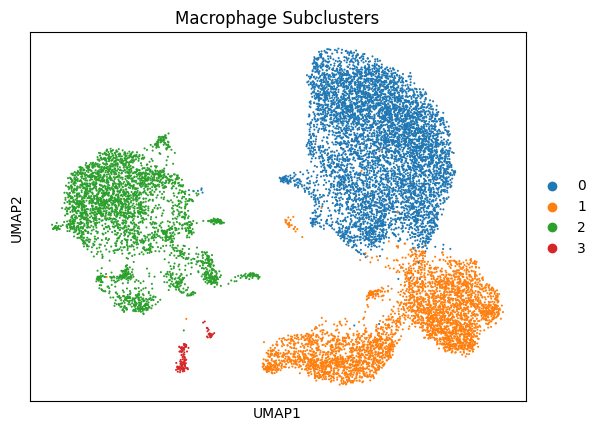

In [57]:
sc.tl.louvain(subset_AF, resolution=0.1)  # Adjust resolution for granularity
sc.pl.umap(subset_AF, color="louvain", title="Macrophage Subclusters")

In [58]:
print(subset_AF.obs["louvain"].unique())


['2', '1', '0', '3']
Categories (4, object): ['0', '1', '2', '3']


In [59]:
# Set Gene Symbol as index instead of Ensembl ID
subset_AF.var.set_index('gene_symbols-4', inplace=True)

In [60]:
d2c.score(subset_AF, use_raw=True)

In [61]:
subset_AF.uns['drug2cell']

AnnData object with n_obs × n_vars = 13443 × 2356
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type', 'louvain'
    var: 'genes', 'all_genes'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

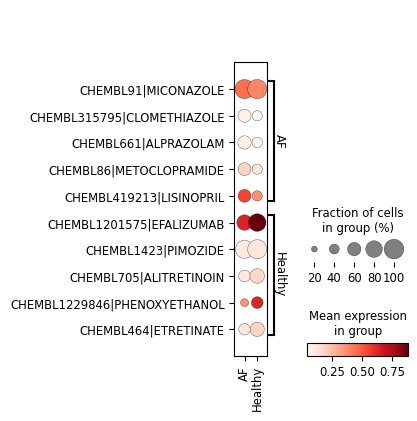

In [12]:
sc.tl.rank_genes_groups(subset_AF.uns['drug2cell'], method="wilcoxon", groupby="Disease")
sc.pl.rank_genes_groups_dotplot(subset_AF.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=5)

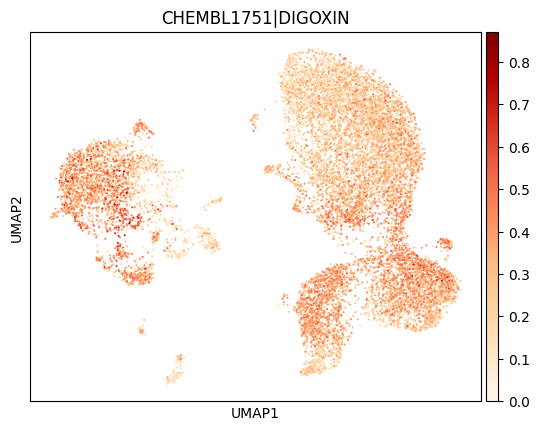

In [16]:
sc.pl.umap(subset_AF.uns['drug2cell'], color="CHEMBL1751|DIGOXIN", color_map="OrRd")

# Split the subclusters 

In [124]:
# Dictionary to store AnnData objects for each subcluster
subcluster_adata = {}

for cluster in subset_AF.obs["louvain"].unique():
    # Subset the AnnData object for the specific subcluster
    adata_sub = subset_AF[subset_AF.obs["louvain"] == cluster].copy()

    # Store in dictionary with cluster number as key
    subcluster_adata[f"adata_subcluster{cluster}"] = adata_sub

    print(f"✅ Subcluster {cluster} stored: {adata_sub.shape}")



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Subcluster 2 stored: (3444, 52143)
✅ Subcluster 1 stored: (3968, 52143)
✅ Subcluster 0 stored: (6425, 52143)
✅ Subcluster 3 stored: (120, 52143)


In [139]:
adata_subcluster2 = subcluster_adata["adata_subcluster2"]
adata_subcluster2


AnnData object with n_obs × n_vars = 3444 × 52143
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type', 'louvain'
    var: 'gene_symbols-2', 'Mito-2', 'Mito-3', 'Mito-4', 'gene_symbols-5', 'Mito-5', 'gene_symbols-6', 'Mito-6', 'n_cells', 'Mito', 'gene_symbols', 'Mito-0', 'gene_symbols-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'log1p_mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'log1p_total_counts-0-0', 'n_cells-

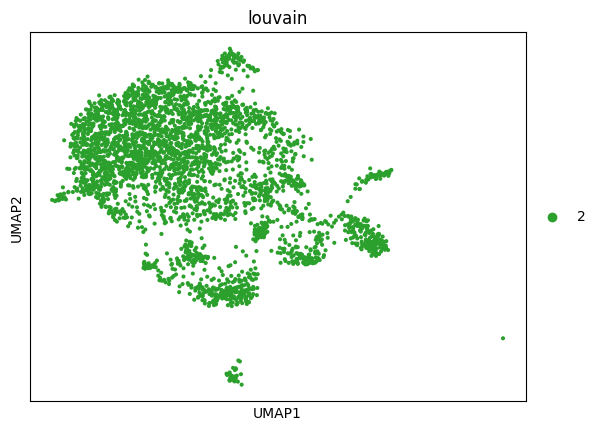

In [140]:
sc.pl.umap(adata_subcluster2, color="louvain")

# D2C on each separate subcluster

In [144]:
d2c.score(adata_subcluster2, use_raw=True)


In [156]:
adata_subcluster2.uns["drug2cell"].var

genes  \
CHEMBL1615779|IOBENGUANE I 131                                                                 SLC6A2   
CHEMBL3989924|LUTETIUM DOTATATE LU-177                                  SSTR4,SSTR1,SSTR5,SSTR2,SSTR3   
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM  COL11A1,COL5A3,COL4A4,COL1A1,COL5A1,COL4A2,COL...   
CHEMBL256997|ATALUREN                               RPS20,RPL18,RPL31,RPS5,RPL6,RPLP0,RPL3,RPS16,R...   
CHEMBL1201556|BECAPLERMIN                                                               PDGFRB,PDGFRA   
...                                                                                               ...   
CHEMBL2068724|ACAMPROSATE CALCIUM                   GABRA3,GABRA1,GABRP,GABRE,GRIN2D,GABRA4,GABRG2...   
CHEMBL1562610|MECLOFENAMATE SODIUM                                            PTGS2,PTGS1,GMNN,CYP2C9   
CHEMBL1200467|HYDROXYZINE PAMOATE                        KDM4A,HSD17B10,POLI,POLK,PLK1,FEN1,POLH,HRH1   
CHEMBL454|BUTALBITAL                                GABRA3,GABRA1,GABRP,GABRE,GABRA4,GABRG2,GABRA6...   
CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE                                             MAP2K2,MAP2K1   

                                                                                            all_genes  
CHEMBL1615779|IOBENGUANE I 131                                                                 SLC6A2  
CHEMBL3989924|LUTETIUM DOTATATE LU-177                                  SSTR3,SSTR2,SSTR1,SSTR5,SSTR4  
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM  COL1A1,COL5A3,COL4A3,COL6A5,COL6A1,COL15A1,COL...  
CHEMBL256997|ATALUREN                               RPS24,RPS11,RPS17,RPS14,RPL9P8,RPL18A,RPS27A,R...  
CHEMBL1201556|BECAPLERMIN                                                               PDGFRB,PDGFRA  
...                                                                                               ...  
CHEMBL2068724|ACAMPROSATE CALCIUM                   GABRB2,GABRA1,GABRB1,GRIN2C,GRIN2D,GRIN2A,GABR...  
CHEMBL1562610|MECLOFENAMATE SODIUM                                      ALOX5,GMNN,PTGS1,CYP2C9,PTGS2  
CHEMBL1200467|HYDROXYZINE PAMOATE                   POLI,EHMT2,FEN1,HRH1,HSD17B10,KDM4A,PLK1,POLH,...  
CHEMBL454|BUTALBITAL                                GABRE,GABRG3,GABRB2,GABRG2,GABRB1,GABRA3,GABRA...  
CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE                                             MAP2K1,MAP2K2  

[2356 rows x 2 columns]

# count genes associated with each drug

In [174]:
import pandas as pd

# Extract Drug2Cell results
drug_gene_mapping = adata_subcluster2.uns["drug2cell"].var

# Convert to DataFrame
df_drug_gene = pd.DataFrame(drug_gene_mapping)

# Reset index to bring drugs into a column
df_drug_gene.reset_index(inplace=True)

df_drug_gene = df_drug_gene.iloc[:,0:2]

df_drug_gene 



genes  \
CHEMBL1615779|IOBENGUANE I 131                                                                 SLC6A2   
CHEMBL3989924|LUTETIUM DOTATATE LU-177                                  SSTR4,SSTR1,SSTR5,SSTR2,SSTR3   
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM  COL11A1,COL5A3,COL4A4,COL1A1,COL5A1,COL4A2,COL...   
CHEMBL256997|ATALUREN                               RPS20,RPL18,RPL31,RPS5,RPL6,RPLP0,RPL3,RPS16,R...   
CHEMBL1201556|BECAPLERMIN                                                               PDGFRB,PDGFRA   
...                                                                                               ...   
CHEMBL2068724|ACAMPROSATE CALCIUM                   GABRA3,GABRA1,GABRP,GABRE,GRIN2D,GABRA4,GABRG2...   
CHEMBL1562610|MECLOFENAMATE SODIUM                                            PTGS2,PTGS1,GMNN,CYP2C9   
CHEMBL1200467|HYDROXYZINE PAMOATE                        KDM4A,HSD17B10,POLI,POLK,PLK1,FEN1,POLH,HRH1   
CHEMBL454|BUTALBITAL                                GABRA3,GABRA1,GABRP,GABRE,GABRA4,GABRG2,GABRA6...   
CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE                                             MAP2K2,MAP2K1   

                                                                                            all_genes  
CHEMBL1615779|IOBENGUANE I 131                                                                 SLC6A2  
CHEMBL3989924|LUTETIUM DOTATATE LU-177                                  SSTR3,SSTR2,SSTR1,SSTR5,SSTR4  
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM  COL1A1,COL5A3,COL4A3,COL6A5,COL6A1,COL15A1,COL...  
CHEMBL256997|ATALUREN                               RPS24,RPS11,RPS17,RPS14,RPL9P8,RPL18A,RPS27A,R...  
CHEMBL1201556|BECAPLERMIN                                                               PDGFRB,PDGFRA  
...                                                                                               ...  
CHEMBL2068724|ACAMPROSATE CALCIUM                   GABRB2,GABRA1,GABRB1,GRIN2C,GRIN2D,GRIN2A,GABR...  
CHEMBL1562610|MECLOFENAMATE SODIUM                                      ALOX5,GMNN,PTGS1,CYP2C9,PTGS2  
CHEMBL1200467|HYDROXYZINE PAMOATE                   POLI,EHMT2,FEN1,HRH1,HSD17B10,KDM4A,PLK1,POLH,...  
CHEMBL454|BUTALBITAL                                GABRE,GABRG3,GABRB2,GABRG2,GABRB1,GABRA3,GABRA...  
CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE                                             MAP2K1,MAP2K2  

[2356 rows x 2 columns]

In [179]:
# Reset index to bring drugs into a column

df_drug_gene.columns = ["Drug", "genes"]  # Name the columns properly

# Split the "Genes" column and count the number of genes per drug
df_drug_gene["Gene Count"] = df_drug_gene["genes"].apply(lambda x: len(x.split(",")) if isinstance(x, str) else 0)

# Sort drugs by number of genes affected
df_drug_gene_sorted = df_drug_gene.sort_values(by="Gene Count", ascending=False)


In [180]:
df_drug_gene_sorted

Drug  \
3                  CHEMBL256997|ATALUREN   
1275           CHEMBL1983268|ENTRECTINIB   
1219              CHEMBL24828|VANDETANIB   
1464  CHEMBL1703|METFORMIN HYDROCHLORIDE   
745               CHEMBL932|DIPYRIDAMOLE   
...                                  ...   
715              CHEMBL2107885|RETEPLASE   
713          CHEMBL2108147|STREPTOKINASE   
1620     CHEMBL2107386|VORAPAXAR SULFATE   
1621    CHEMBL2108570|ABOBOTULINUMTOXINA   
0         CHEMBL1615779|IOBENGUANE I 131   

                                                  genes  Gene Count  
3     RPS20,RPL18,RPL31,RPS5,RPL6,RPLP0,RPL3,RPS16,R...          73  
1275  BTK,FYN,MAP4K5,FLT4,ROS1,TNK2,LTK,HIPK2,PKN2,S...          54  
1219  BTK,FYN,MAP4K5,FLT4,TDP1,EPHA3,LTK,ERBB3,EPHA8...          49  
1464  NDUFAB1,NDUFS1,NDUFB4,NDUFB2,NDUFB7,NDUFC1,NDU...          47  
745   BRCA1,TDP1,PDE4A,HSD17B10,PDE8A,TSG101,RAPGEF3...          47  
...                                                 ...         ...  
715                                                 PLG           1  
713                                                 PLG           1  
1620                                                F2R           1  
1621                                             SNAP25           1  
0                                                SLC6A2           1  

[2356 rows x 3 columns]

/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_19622/4281247398.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gene Count", y="Drug", data=df_plot, palette="viridis")


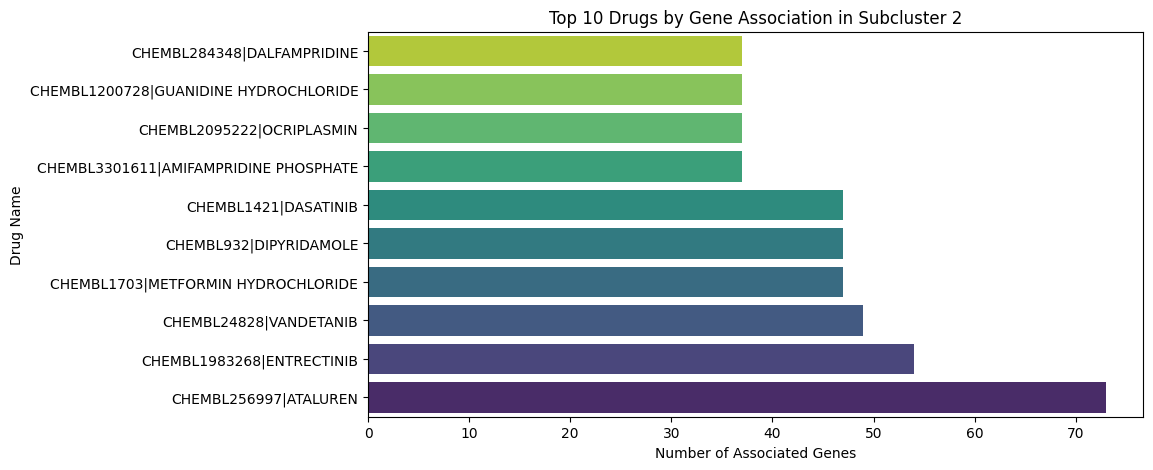

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 drugs
top_n = 10
df_plot = df_drug_gene_sorted.head(top_n)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Gene Count", y="Drug", data=df_plot, palette="viridis")
plt.xlabel("Number of Associated Genes")
plt.ylabel("Drug Name")
plt.title(f"Top {top_n} Drugs by Gene Association in Subcluster 2")
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()


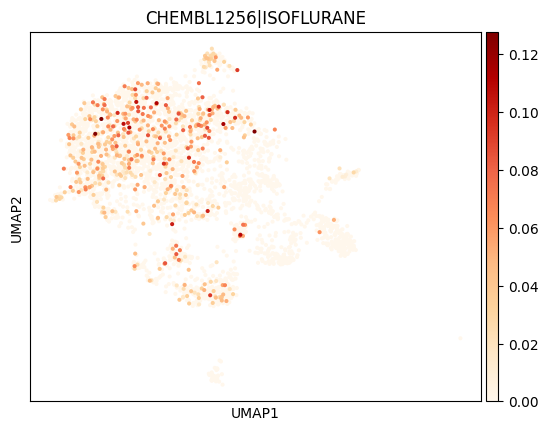

In [192]:
sc.pl.umap(adata_subcluster2.uns['drug2cell'], color="CHEMBL1256|ISOFLURANE", color_map="OrRd")

# Disease vs Healthy Comparison

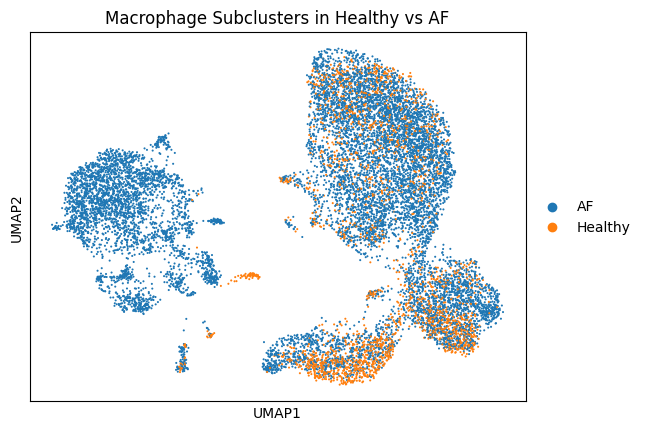

In [62]:
sc.pl.umap(subset_AF, color="Disease", title="Macrophage Subclusters in Healthy vs AF")

# Differential Expression Analysis

In [11]:
# Run differential expression analysis
sc.tl.rank_genes_groups(subset_AF, groupby="louvain", method="wilcoxon")

# Convert results into a DataFrame
result = subset_AF.uns["rank_genes_groups"]
groups = result["names"].dtype.names  # Get cluster names

# Extract top 10 marker genes per cluster
top_genes = {cluster: result["names"][cluster][:10] for cluster in groups}

# Convert to DataFrame
top_genes_df = pd.DataFrame(top_genes)
top_genes_df

0                1                2                3
0  ENSG00000231389  ENSG00000163131  ENSG00000291237  ENSG00000143546
1  ENSG00000198502  ENSG00000085265  ENSG00000237550  ENSG00000116741
2  ENSG00000223865  ENSG00000163220  ENSG00000248527  ENSG00000122862
3  ENSG00000204287  ENSG00000112096  ENSG00000171109  ENSG00000132475
4  ENSG00000019582  ENSG00000103187  ENSG00000290318  ENSG00000105835
5  ENSG00000196735  ENSG00000169442  ENSG00000204389  ENSG00000185201
6  ENSG00000196126  ENSG00000197249  ENSG00000080824  ENSG00000163220
7  ENSG00000179344  ENSG00000196352  ENSG00000260272  ENSG00000163563
8  ENSG00000002586  ENSG00000245532  ENSG00000144649  ENSG00000163041
9  ENSG00000204257  ENSG00000143546  ENSG00000198695  ENSG00000132965

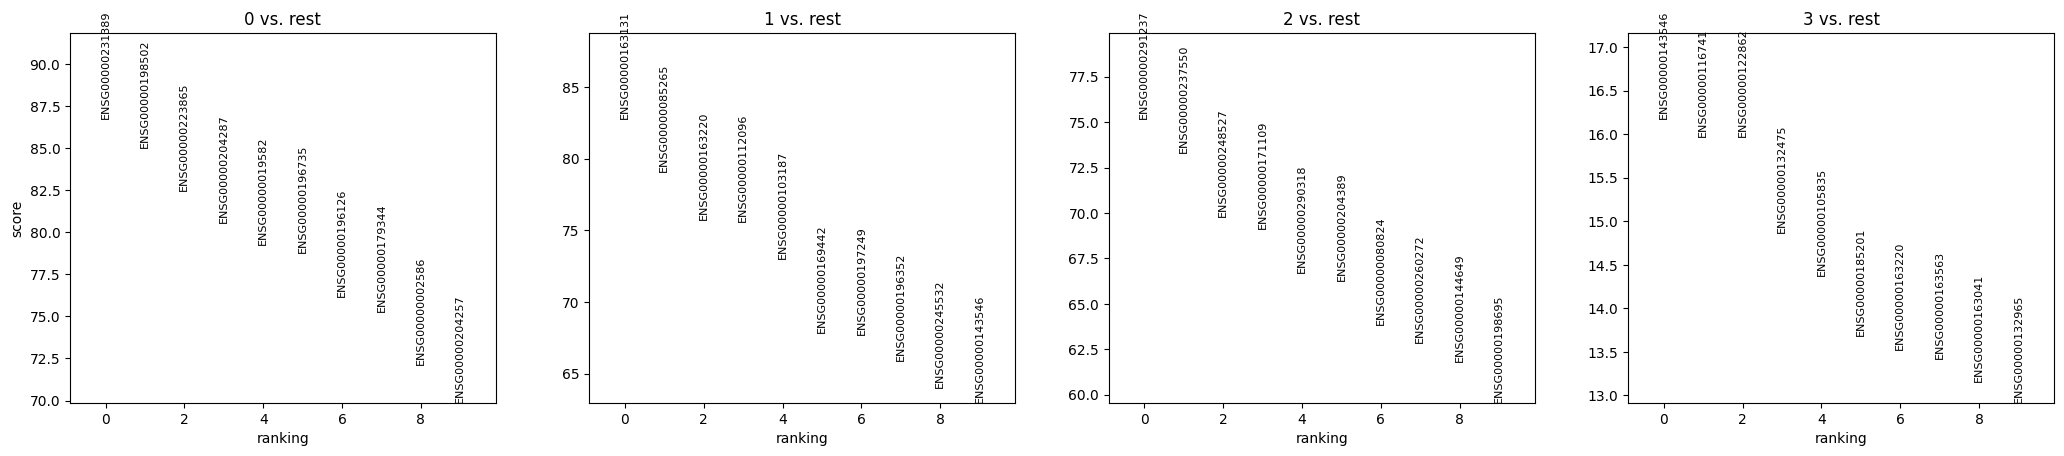

In [12]:
# Visualize top 10 markers
sc.pl.rank_genes_groups(subset_AF, n_genes=10, sharey=False)  

# Gene Symbols instead of EnsemblID

In [13]:
# Set Gene Symbol as index instead of Ensembl ID
subset_AF.var.set_index('gene_symbols-4', inplace=True)

In [14]:
# Recompute louvain and adjust resolution for granularity
sc.tl.louvain(subset_AF, resolution=0.1)  

In [15]:
# Run differential expression analysis
sc.tl.rank_genes_groups(subset_AF, groupby="louvain", method="wilcoxon")

# Convert results into a DataFrame
result = subset_AF.uns["rank_genes_groups"]
groups = result["names"].dtype.names  # Get cluster names

# Extract top 10 marker genes per cluster
top_genes = {cluster: result["names"][cluster][:10] for cluster in groups}

# Convert to DataFrame
df = pd.DataFrame(top_genes)
df

0       1         2        3
0       nan    CTSS       nan   S100A8
1  HLA-DRB5    FCN1       nan     RGS2
2       nan  S100A9  MTATP6P1     SRGN
3       nan    SOD2      MFN1    H3F3B
4      CD74   COTL1       nan    NAMPT
5       nan    CD52       nan   IFITM2
6       nan     nan  HSP90AA1   S100A9
7       nan    CD55       nan     MNDA
8      CD99   NEAT1   FAM198A    H3F3A
9       nan  S100A8    MT-ND6  ALOX5AP

In [16]:
# Some functions require louvain in uns
subset_AF.obs['louvain'] = subset_AF.uns['louvain']

# Drug2cell

In [17]:
# Run drug2cell
d2c.score(subset_AF, use_raw=True)

In [18]:
# View the newly created anndata object 
subset_AF.uns['drug2cell']

AnnData object with n_obs × n_vars = 13957 × 2356
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type', 'louvain'
    var: 'genes', 'all_genes'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [19]:
sc.tl.rank_genes_groups(subset_AF.uns['drug2cell'], method="wilcoxon", groupby="Disease")

## d2c Results on Disease groups

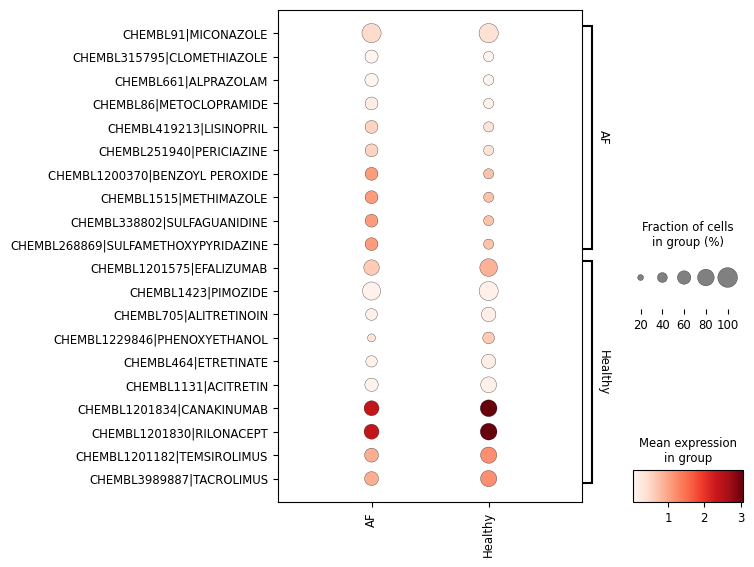

In [20]:
sc.pl.rank_genes_groups_dotplot(subset_AF.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=10, figsize=(6,6))

In [21]:
sc.get.rank_genes_groups_df(subset_AF.uns['drug2cell'], group = 'AF')

names     scores  logfoldchanges          pvals  \
0              CHEMBL91|MICONAZOLE  14.800114        0.256653   1.462362e-49   
1       CHEMBL315795|CLOMETHIAZOLE  14.403851        0.632293   4.893914e-47   
2             CHEMBL661|ALPRAZOLAM  14.183189        0.604100   1.164324e-45   
3          CHEMBL86|METOCLOPRAMIDE  14.025899        0.657709   1.082327e-44   
4          CHEMBL419213|LISINOPRIL  14.019190        0.752660   1.189652e-44   
...                            ...        ...             ...            ...   
2351          CHEMBL464|ETRETINATE -16.190292       -0.654938   5.904690e-59   
2352  CHEMBL1229846|PHENOXYETHANOL -16.267904       -1.039848   1.667704e-59   
2353        CHEMBL705|ALITRETINOIN -16.400330       -0.639000   1.902055e-60   
2354           CHEMBL1423|PIMOZIDE -16.917603       -0.311377   3.337392e-64   
2355      CHEMBL1201575|EFALIZUMAB -21.849577       -0.688278  7.845695e-106   

          pvals_adj  
0      1.722662e-47  
1      5.490506e-45  
2      1.246885e-43  
3      1.062484e-42  
4      1.121128e-42  
...             ...  
2351   2.782290e-56  
2352   9.822776e-57  
2353   1.493747e-57  
2354   3.931448e-61  
2355  1.848446e-102  

[2356 rows x 5 columns]

In [22]:
sc.get.rank_genes_groups_df(subset_AF.uns['drug2cell'], group = 'Healthy')

names     scores  logfoldchanges          pvals  \
0         CHEMBL1201575|EFALIZUMAB  21.849577        0.688278  7.845695e-106   
1              CHEMBL1423|PIMOZIDE  16.917603        0.311377   3.337392e-64   
2           CHEMBL705|ALITRETINOIN  16.400330        0.639000   1.902055e-60   
3     CHEMBL1229846|PHENOXYETHANOL  16.267904        1.039848   1.667704e-59   
4             CHEMBL464|ETRETINATE  16.190292        0.654938   5.904690e-59   
...                            ...        ...             ...            ...   
2351       CHEMBL419213|LISINOPRIL -14.019190       -0.752660   1.189652e-44   
2352       CHEMBL86|METOCLOPRAMIDE -14.025899       -0.657709   1.082327e-44   
2353          CHEMBL661|ALPRAZOLAM -14.183189       -0.604100   1.164324e-45   
2354    CHEMBL315795|CLOMETHIAZOLE -14.403851       -0.632293   4.893914e-47   
2355           CHEMBL91|MICONAZOLE -14.800114       -0.256653   1.462362e-49   

          pvals_adj  
0     1.848446e-102  
1      3.931448e-61  
2      1.493747e-57  
3      9.822776e-57  
4      2.782290e-56  
...             ...  
2351   1.121128e-42  
2352   1.062484e-42  
2353   1.246885e-43  
2354   5.490506e-45  
2355   1.722662e-47  

[2356 rows x 5 columns]

In [95]:
d2c_adata

AnnData object with n_obs × n_vars = 13957 × 2356
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type', 'louvain'
    var: 'genes', 'all_genes'
    uns: 'rank_genes_groups', 'log1p', 'pca', 'neighbors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## d2c Results on Louvain Clusters

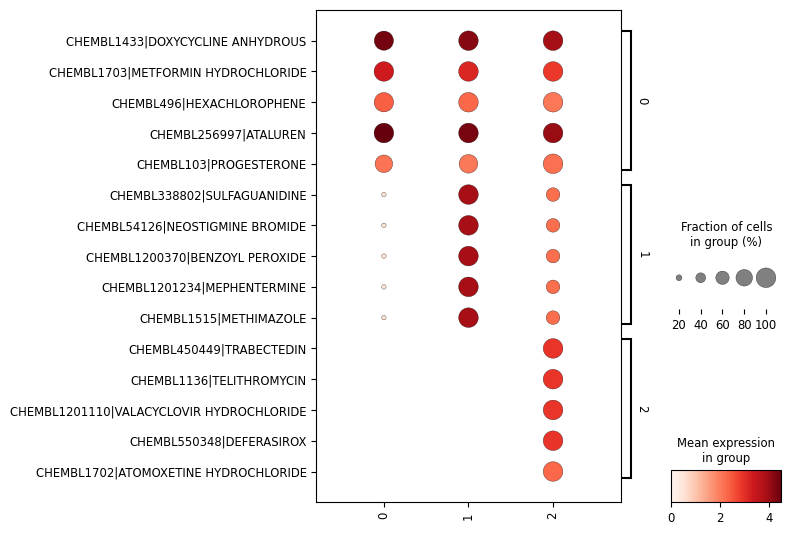

In [79]:
sc.pl.rank_genes_groups_dotplot(subset_AF.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=5, figsize=(6,6))

In [88]:
sc.get.rank_genes_groups_df(d2c_adata, group = '1')


names     scores  logfoldchanges  \
0                CHEMBL338802|SULFAGUANIDINE  89.370415        5.819016   
1            CHEMBL54126|NEOSTIGMINE BROMIDE  89.370415        5.819016   
2             CHEMBL1200370|BENZOYL PEROXIDE  89.370415        5.819016   
3                CHEMBL1201234|MEPHENTERMINE  89.370415        5.819016   
4                     CHEMBL1515|METHIMAZOLE  89.370415        5.819016   
...                                      ...        ...             ...   
2351  CHEMBL1200491|EPINASTINE HYDROCHLORIDE -23.036827       -9.686754   
2352   CHEMBL2360580|BUCLIZINE HYDROCHLORIDE -23.036827       -9.686754   
2353      CHEMBL1703|METFORMIN HYDROCHLORIDE -24.262953       -0.256333   
2354                  CHEMBL103|PROGESTERONE -24.829123       -0.128049   
2355        CHEMBL1433|DOXYCYCLINE ANHYDROUS -31.928907       -0.202424   

              pvals      pvals_adj  
0      0.000000e+00   0.000000e+00  
1      0.000000e+00   0.000000e+00  
2      0.000000e+00   0.000000e+00  
3      0.000000e+00   0.000000e+00  
4      0.000000e+00   0.000000e+00  
...             ...            ...  
2351  1.993710e-117  4.944400e-116  
2352  1.993710e-117  4.944400e-116  
2353  4.826824e-130  1.249670e-128  
2354  4.346957e-136  1.137937e-134  
2355  1.060376e-223  2.974102e-222  

[2356 rows x 5 columns]